In [29]:
# Import my libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Download my dataset and read the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Read fisrt five rows of my dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# check the summary statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [15]:
# calculate Basic statistics of my dataset
numerica_column = df.drop(columns="species")
print("Mean:\n", numerica_column.mean())
print("Median:\n", numerica_column.median())
print("Mode:\n", numerica_column.mode().iloc[0])

Mean:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Median:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64
Mode:
 sepal_length    5.0
sepal_width     3.0
petal_length    1.5
petal_width     0.2
Name: 0, dtype: float64


Text(0, 0.5, 'Frequency')

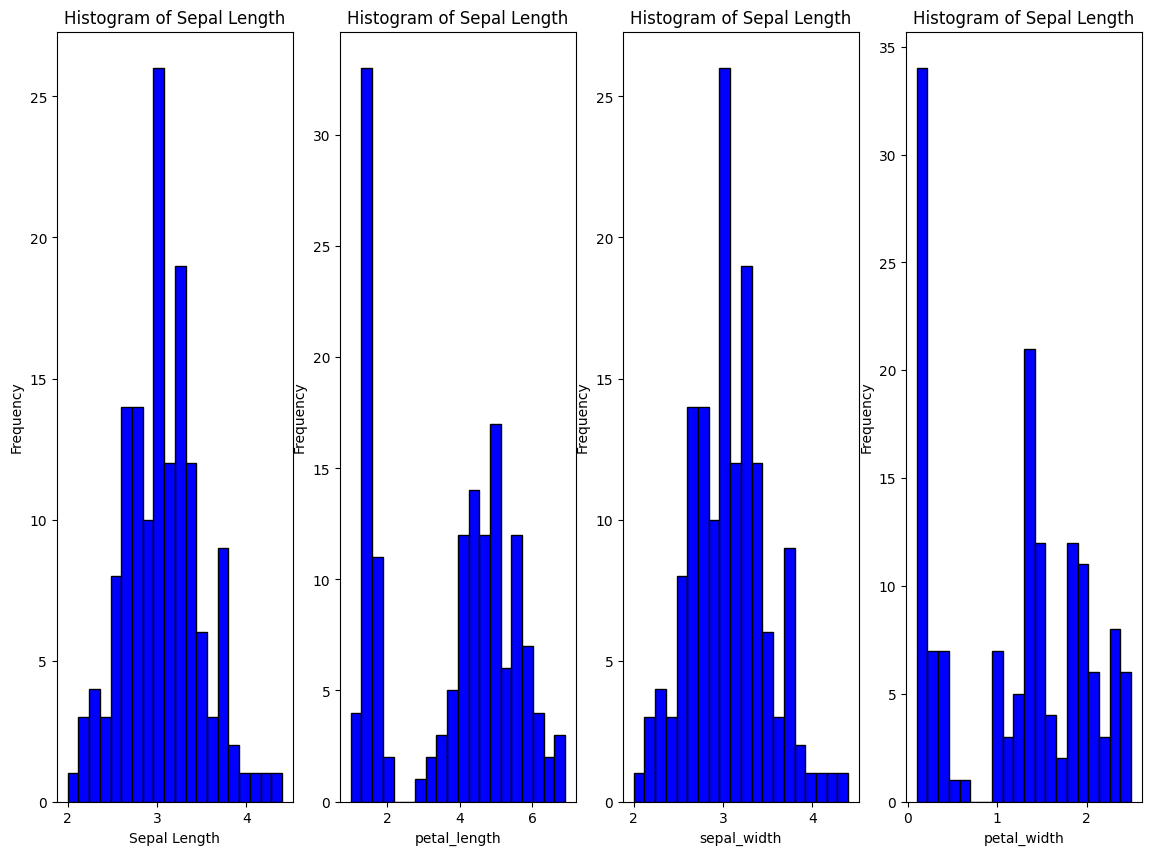

In [21]:
plt.figure(figsize=(14,10))
plt.subplot(1,4,1)
plt.hist(df["sepal_width"],bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

plt.subplot(1,4,2)
plt.hist(df["petal_length"],bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('petal_length')
plt.ylabel('Frequency')

plt.subplot(1,4,3)
plt.hist(df["sepal_width"],bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('sepal_width')
plt.ylabel('Frequency')

plt.subplot(1,4,4)
plt.hist(df["petal_width"],bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Sepal Length')
plt.xlabel('petal_width')
plt.ylabel('Frequency')


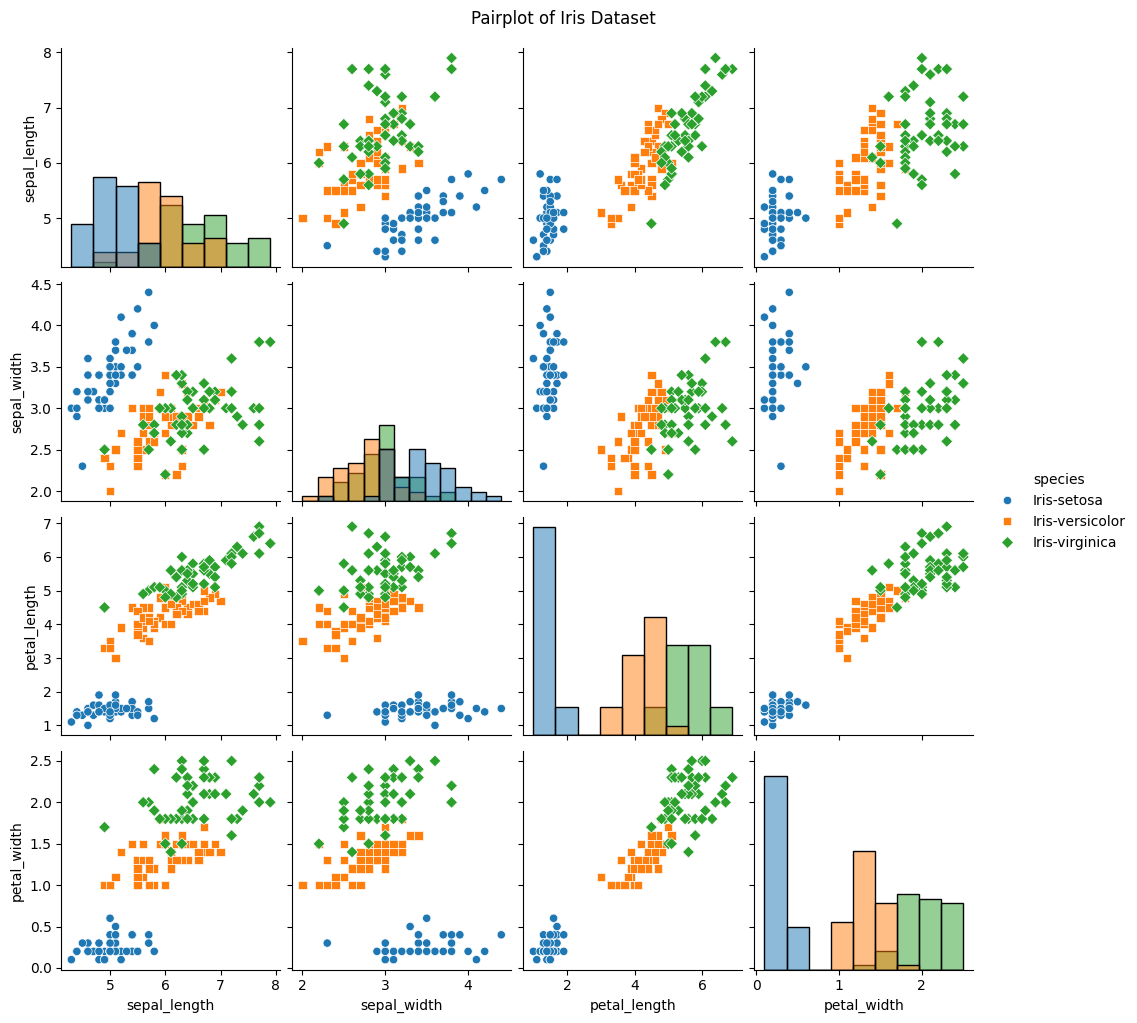

In [22]:
# Using Seaborn's pairplot to visualize pairwise relationships
sns.pairplot(df, hue='species', diag_kind='hist', markers=["o", "s", "D"])

# Display the plot
plt.suptitle("Pairplot of Iris Dataset", y=1.02)  # Adjust the title position
plt.show()

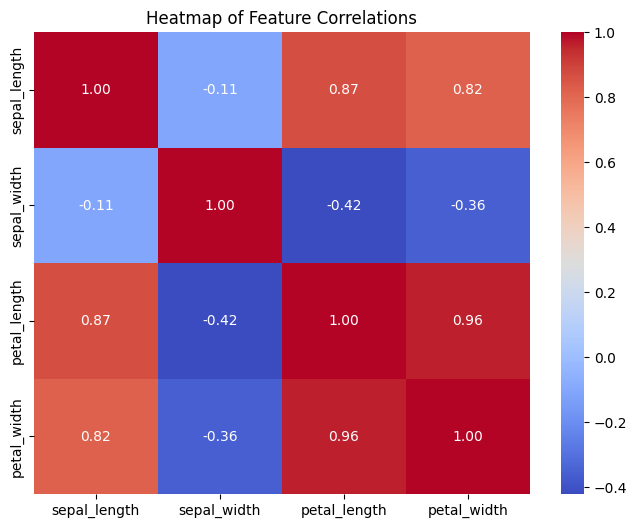

In [24]:
# Calculate the correlation matrix
corr_matrix = df.drop(columns="species").corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

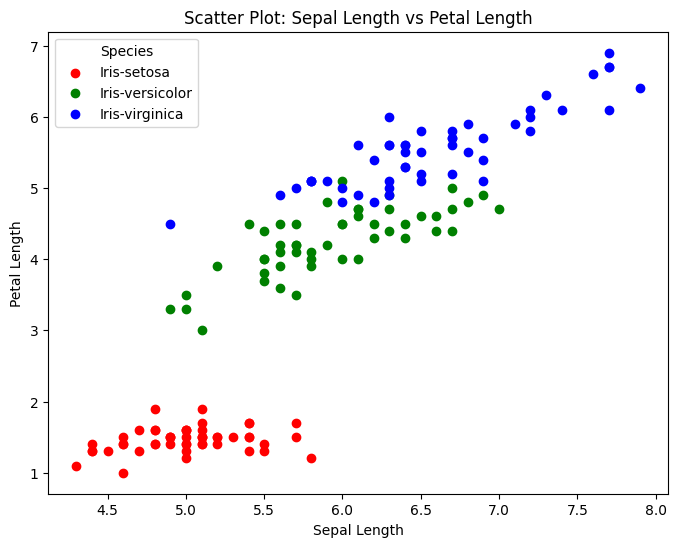

In [26]:
# Scatter plot for Sepal Length vs Petal Length by Species
plt.figure(figsize=(8, 6))

# Define colors for each species
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}
# Plot the scatter plot
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=species, color=colors[species])

plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.show()

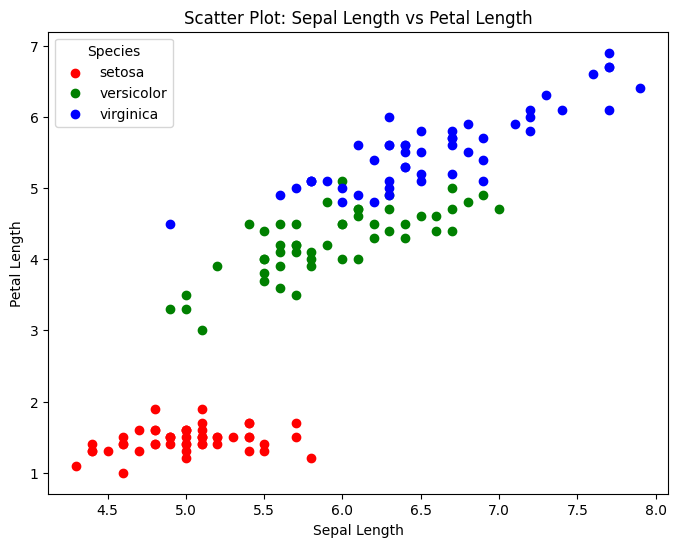

In [27]:
plt.figure(figsize=(8, 6))

# Define colors for each species without the "Iris-" prefix
colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

# Plot the scatter plot
for species in df['species'].unique():
    # Strip the "Iris-" prefix to match the colors dictionary
    stripped_species = species.replace("Iris-", "")
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['petal_length'], label=stripped_species, color=colors[stripped_species])

plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.show()

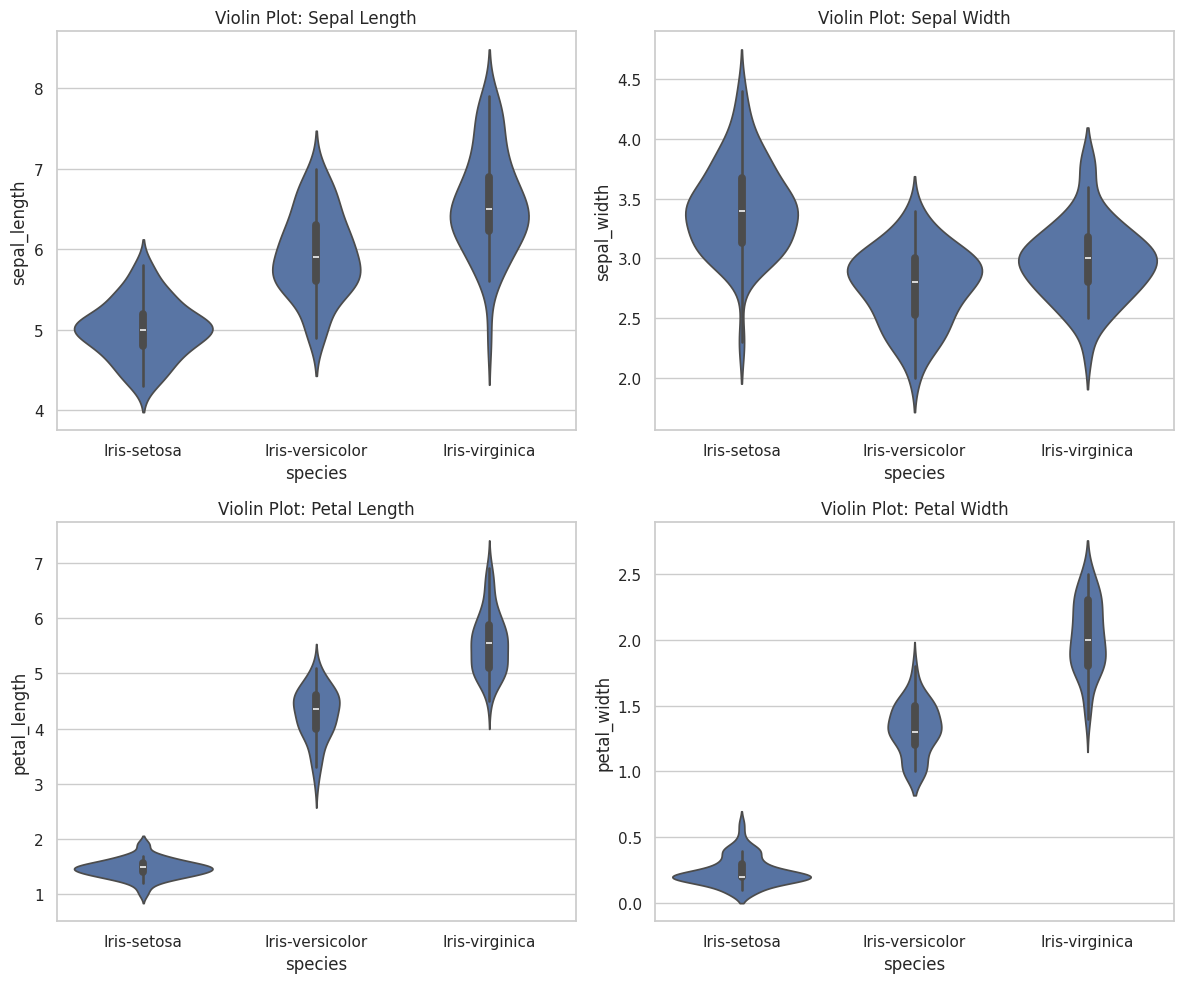

In [28]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting violin plots for each feature
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=df)
plt.title('Violin Plot: Sepal Length')

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title('Violin Plot: Sepal Width')

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=df)
plt.title('Violin Plot: Petal Length')

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=df)
plt.title('Violin Plot: Petal Width')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


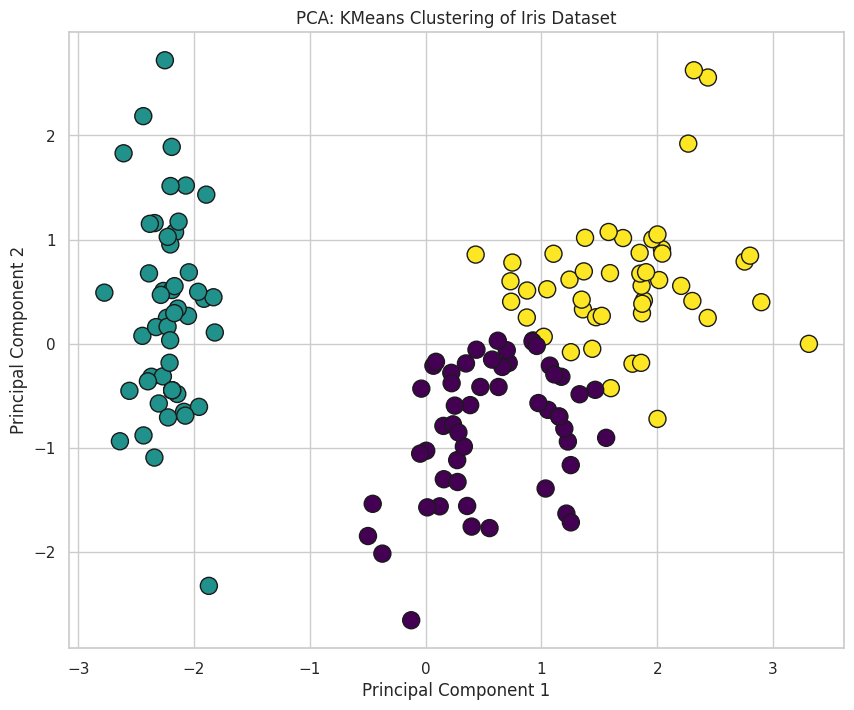

cluster          Cluster 1  Cluster 2  Cluster 3
species                                         
Iris-setosa              0         50          0
Iris-versicolor         39          0         11
Iris-virginica          14          0         36


In [30]:
# Preprocessing the data: Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('species', axis=1))

# Performing KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Adding cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualizing the Clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', edgecolor='k', s=150)
plt.title('PCA: KMeans Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Comparing the clusters with the actual species
df['cluster'] = df['cluster'].map({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3'})
ct = pd.crosstab(df['species'], df['cluster'])
print(ct)

**Key Findings from the Iris Dataset Analysis
Data Distribution and Feature Analysis:**

Sepal and Petal Lengths/Widths:
The violin plots revealed that Iris-setosa is distinctly separated from Iris-versicolor and Iris-virginica based on petal length and petal width. Specifically, Iris-setosa has much smaller petal lengths and widths compared to the other species.
Sepal length and sepal width showed some overlap between species, but Iris-setosa generally has a wider sepal width compared to the other two species.
Correlation Insights:

The heatmap of the correlation matrix showed strong positive correlations between petal length and petal width. These features are highly correlated, indicating that as petal length increases, petal width also tends to increase.
Sepal features (length and width) are less correlated with petal features, indicating they may provide different information about the species.
Species Differentiation:

Iris-setosa is clearly distinguishable from the other species using petal features. The scatter plot of sepal length versus petal length showed that Iris-setosa forms a distinct cluster on its own, with smaller values for both petal length and width.
Iris-versicolor and Iris-virginica overlap more with each other, especially in sepal dimensions, making them more challenging to distinguish based solely on sepal features.

**Cluster Analysis:**

The KMeans clustering analysis identified three clusters:
Cluster 1 corresponds entirely to Iris-versicolor.
Cluster 2 exclusively contains Iris-setosa, indicating that this species is very well-separated based on the features.
Cluster 3 primarily consists of Iris-virginica, with some overlap from Iris-versicolor.
The clustering results reflect that while Iris-setosa is easily separable, there is some ambiguity between Iris-versicolor and Iris-virginica, which may share similar feature values.
Patterns and Insights
Iris-setosa: This species is well-defined and can be easily distinguished from the other two species using petal length and width. This clear distinction is also confirmed by the clustering analysis, where Iris-setosa formed a unique cluster without overlap.

Iris-versicolor and Iris-virginica: These species have overlapping characteristics, particularly in sepal length and width. However, petal dimensions (especially petal length) still allow for some differentiation, though not as distinctly as with Iris-setosa.

Feature Importance: Petal features (length and width) are more effective for species classification than sepal features. This is evident both in the correlation analysis and the clustering results, where petal dimensions contributed more to separating the species.

**Conclusion**
The exploratory data analysis (EDA) of the Iris dataset provides valuable insights into how different species can be distinguished. Iris-setosa stands out as the most easily separable species due to its unique petal dimensions. In contrast, Iris-versicolor and Iris-virginica have more overlap, making them less distinguishable, though petal features still offer a basis for differentiation. The cluster analysis further confirmed these findings, demonstrating the power of unsupervised learning methods like KMeans in identifying natural groupings within the data.